In [3]:
#################################################################################################################################
################################################   딥러닝  22.11.14 : 1주차 code ################################################
#################################################################################################################################

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical # 원합인코딩()
from tensorflow.keras.layers import Dense, Flatten # 히든 레이터 한단을 만들기위해 /
from tensorflow.keras.models import Sequential # 차례대로 모형을 쌓겠다

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data() 

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train[0].shape

(28, 28)

In [6]:
# label 이름을 저장
# 딕셔너리의 형태로 저장 {key:value}
item = {
      0: 'T-shirt/top'
    , 1: 'Trouser'
    , 2: 'Pullover'
    , 3: 'Dress'
    , 4: 'Coat'
    , 5: 'Sandal'
    , 6: 'Shirt'
    , 7: 'Sneaker'
    , 8: 'Bag'
    , 9: 'Ankle boot'
}


In [7]:
# 데이터 포멧 확인
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


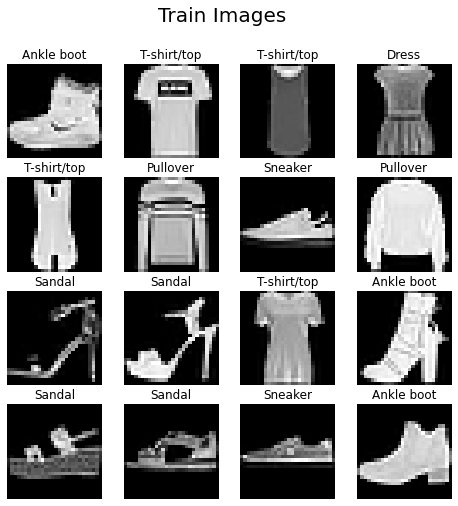

In [8]:
# train 이미지 확인
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1) # plt.subplot(row,column,index) == par(mfrow=c(4,4))
  plt.suptitle("Train Images", fontsize=20) # 하나의 큰 제목
  plt.title(item[y_train[i]])
  plt.imshow(x_train[i], cmap=plt.cm.gray)
  plt.axis('off')

plt.show()

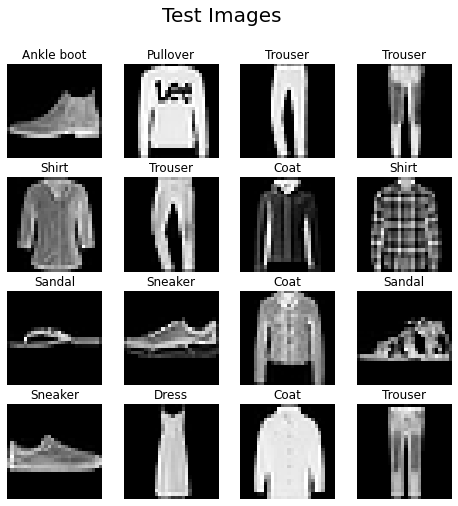

In [9]:
# test 이미지 확인
plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4,4, i+1) # plt.subplot(row,column,index) == par(mfrow=c(4,4))
  plt.suptitle("Test Images", fontsize=20) # 하나의 큰 제목
  plt.title(item[y_test[i]])
  plt.imshow(x_test[i], cmap=plt.cm.gray)
  plt.axis('off')

plt.show()

In [10]:
## 전처리 ##
# 이미지 데이터 전처리

x_train = x_train.astype('float32') # datatype을 float32로 변경(GPU로 사용하기 위해서는 32bit)
x_train = x_train/255 # normalization

## 스케일링 : 시작점을 잘 찾기 위해서, (0,1) 또는 (-1,1)

x_train = x_test.astype('float32')
x_test = x_test/255

In [11]:
y_onehot_train = to_categorical(y_train, num_classes= 10) # one-hot encoding을 통해 10개의 레이블이 0,1 로 표현
y_onehot_test = to_categorical(y_test, num_classes = 10)

In [12]:
y_onehot_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
# 전처리 결과
for i in [x_train, y_onehot_train, x_test, y_onehot_test]:
  print(i.shape)

(10000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [14]:
##  keras 를 활용한 모델 생성 ##
OUTPUT_SHAPE = 10 # 출력 데이텉가 나오는 포맷
BATCH_SIZE = 128 # 한 번에 처리할 데이터량 설정
EPOCHS = 10 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습진행상황 출력모드(기본값=1)

In [49]:
 model = Sequential([ # 모델을 한층한층 쌓아라
    Flatten(), # 데이터를 벡터의 형태로 바꿈(즉 현재 28x28matrix를 벡터로 바꾸어야 한다)
    Dense(128,activation='relu'),  # 128개 노드마다 렐루 활성함수
    Dense(64,activation='relu'),
    Dense(10,activation='softmax') # y를 예측한다. 
])


In [50]:
## 신경망 모델 컴파일
# : 어떠한 목적함수수사용하고, 목적함수를 최적화 할 때 사용될 최적화알고리즘 선택, 모형의 성능의 상황 모니터링은 어느것으러?

model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

## 컴파일 이란?? :주어진 language로 작성된 컴퓨터 프로그램을 다른 언어의 동등한 프로그램으로 변환하는 프로세스

In [51]:
history = model.fit(
    x_train, y_onehot_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = VERBOSE,
    validation_split=0.3
)

# 2.11초, 로스값 22.277 정확도 0.0991 -> 로스값이 점점 작아지는 방향으로 작동동

Epoch 1/10
55/55 [==============================] - 1s 9ms/step - loss: 36.3028 - accuracy: 0.0951 - val_loss: 14.1974 - val_accuracy: 0.1157
Epoch 2/10
55/55 [==============================] - 0s 6ms/step - loss: 10.2648 - accuracy: 0.1053 - val_loss: 8.9106 - val_accuracy: 0.1043
Epoch 3/10
55/55 [==============================] - 0s 5ms/step - loss: 6.0950 - accuracy: 0.1056 - val_loss: 4.6699 - val_accuracy: 0.0993
Epoch 4/10
55/55 [==============================] - 0s 5ms/step - loss: 4.0306 - accuracy: 0.1141 - val_loss: 3.9733 - val_accuracy: 0.0990
Epoch 5/10
55/55 [==============================] - 0s 5ms/step - loss: 3.4869 - accuracy: 0.1246 - val_loss: 3.6417 - val_accuracy: 0.0957
Epoch 6/10
55/55 [==============================] - 0s 8ms/step - loss: 3.1283 - accuracy: 0.1240 - val_loss: 3.2710 - val_accuracy: 0.1003
Epoch 7/10
55/55 [==============================] - 1s 9ms/step - loss: 2.8505 - accuracy: 0.1376 - val_loss: 3.1343 - val_accuracy: 0.0973
Epoch 8/10
55/55 

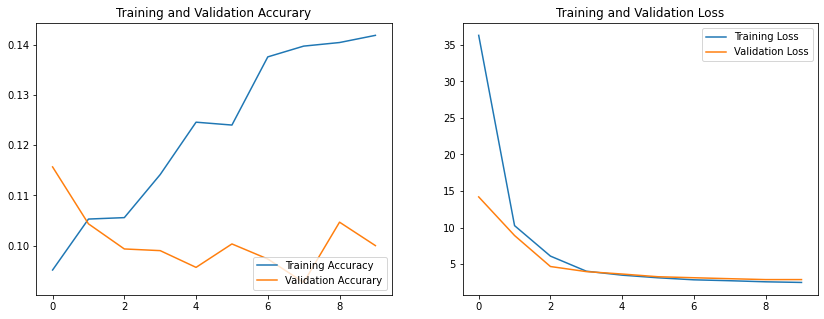

In [52]:
## 결과확인

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label="Validation Accurary")
plt.legend(loc='lower right')
plt.title("Training and Validation Accurary")

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

In [53]:
history.history

{'loss': [36.30278015136719,
  10.264822959899902,
  6.09501838684082,
  4.030606746673584,
  3.4868721961975098,
  3.1282684803009033,
  2.8505403995513916,
  2.727003812789917,
  2.5786314010620117,
  2.490652322769165],
 'accuracy': [0.09514285624027252,
  0.10528571158647537,
  0.10557142645120621,
  0.11414285749197006,
  0.12457142770290375,
  0.12399999797344208,
  0.13757142424583435,
  0.1397142857313156,
  0.1404285728931427,
  0.14185714721679688],
 'val_loss': [14.197434425354004,
  8.910634994506836,
  4.669893741607666,
  3.9732775688171387,
  3.6416945457458496,
  3.270972728729248,
  3.134253978729248,
  3.003589153289795,
  2.8809919357299805,
  2.881826877593994],
 'val_accuracy': [0.11566666513681412,
  0.10433333367109299,
  0.09933333098888397,
  0.0989999994635582,
  0.09566666930913925,
  0.1003333330154419,
  0.09733333438634872,
  0.09266666322946548,
  0.10466666519641876,
  0.10000000149011612]}

In [54]:
## 신경망 모델 평가

# 테스트 데이터를 이용한 평가

model.evaluate(x_test, y_onehot_test)


313/313 [==============================] - 1s 3ms/step - loss: 2.3028 - accuracy: 0.0725


[2.302767038345337, 0.07249999791383743]

In [55]:
y_pred_enc = model.predict(x_test)
y_pred_enc[0:5]

313/313 [==============================] - 1s 2ms/step


array([[0.10417948, 0.09859125, 0.10085574, 0.10354046, 0.09763931,
        0.10451522, 0.09485963, 0.09899314, 0.09950727, 0.09731843],
       [0.10402194, 0.09917349, 0.10104007, 0.10351725, 0.09734828,
        0.10488656, 0.09462393, 0.0981354 , 0.10015401, 0.09709891],
       [0.10408854, 0.09857799, 0.10124936, 0.10384382, 0.09779164,
        0.10472948, 0.09475306, 0.09842546, 0.09993656, 0.09660406],
       [0.10488006, 0.0984387 , 0.10127757, 0.10367087, 0.09742574,
        0.10460826, 0.09500045, 0.09871384, 0.09989329, 0.09609122],
       [0.104489  , 0.09859867, 0.10070131, 0.10366493, 0.09785833,
        0.10463531, 0.09493029, 0.09887929, 0.09965866, 0.09658425]],
      dtype=float32)

In [58]:
y_pred=[np.argmax(i) for i in y_pred_enc]

In [59]:
y_pred[0:10]

[5, 5, 5, 0, 5, 5, 0, 5, 5, 5]

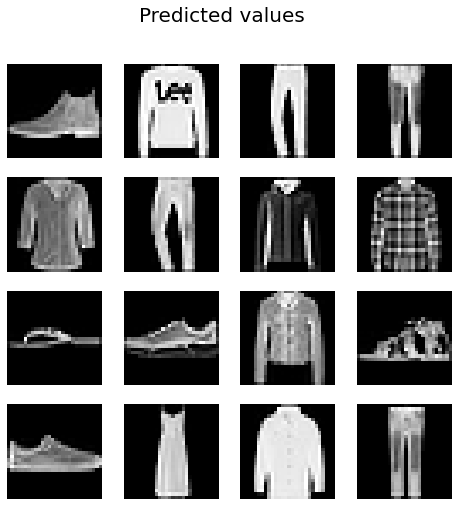

In [60]:
fig, ax = plt.subplots(figsize=(8,8))
for idx, row in enumerate(x_test[:16]) :
  plt.subplot(4,4,idx+1)
  img = row.reshape(28,28)
  fig.suptitle("Predicted values", fontsize=20)
  plt.axis('off')
  plt.imshow(img,cmap=plt.cm.gray)

In [63]:
## 혼동행렬 = 오차행렬

matrix = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(matrix)
df.colums = item.values()
df.index = item.values()
df

<ipython-input-63-5dba0e0f0e87>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = item.values()


,0,1,2,3,4,5,6,7,8,9
T-shirt/top,26,0,0,9,0,965,0,0,0,0
Trouser,23,0,0,4,0,973,0,0,0,0
Pullover,24,0,0,7,0,969,0,0,0,0
Dress,33,0,0,15,0,952,0,0,0,0
Coat,26,0,0,6,0,968,0,0,0,0
Sandal,226,0,0,89,1,684,0,0,0,0
Shirt,26,0,0,9,0,965,0,0,0,0
Sneaker,44,0,0,4,0,952,0,0,0,0
Bag,94,0,0,12,0,894,0,0,0,0
Ankle boot,70,0,0,9,0,921,0,0,0,0
